# Tasks

Machine Learning and Statistics

winter 23/24

Jamie Roche
***

### Task 1

 > Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such
as `math`. In this task,1 you should write a function `sqrt(x)` to
approximate the square root of a floating point number x without
using the power operator or a package
>
> Rather, you should use the Newton’s method. Start with initial guess for the square root called `z0`. You then repeatedly improve it using the following formula, until the difference between
some previous guess zi and the next zi+1 is less than some
threshold, say `0.01`.



 ####  <p style="text-align: center;"> z<sub>i+1</sub>  = $ z_i − \frac{z_i \times z_i - x}{2z_i}$ </p>

~~ https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

~~ https://docs.document360.com/docs/how-to-center-align-the-text-in-markdown

In [ ]:
def sqrt(x):
    # inital guess
    z = x/4.0

    # loop until reasonable accurate guess is achieved 
    
    while ((z*z-x)>0.000000001):
        
        z = z - (((z*z)-x)/(2*z))

    return z

In [ ]:
# Test Function 
num = 90
y = sqrt(num)
y

In [ ]:
# compare differnece between python and newtons 

abs((num**0.5)-y)


End Task 1 - Improve answer later 

Normal probability Funciton

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2} \big ( \frac {x - \mu}{\sigma} \big) ^2}  $


In [ ]:
import numpy as np

def normal_pdf (x, mu=0.0, sigma=1.0):
    #Answer A*B
    A = 1.0/(sigma *np.sqrt(2.0*np.pi))
    B = np.exp(-0.5*((x-mu)/sigma)**2)
    return A*B

In [ ]:
normal_pdf(0.0,mu=-0.0,sigma=np.sqrt(0.2))

## Plots

![normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/330px-Normal_Distribution_PDF.svg.png)

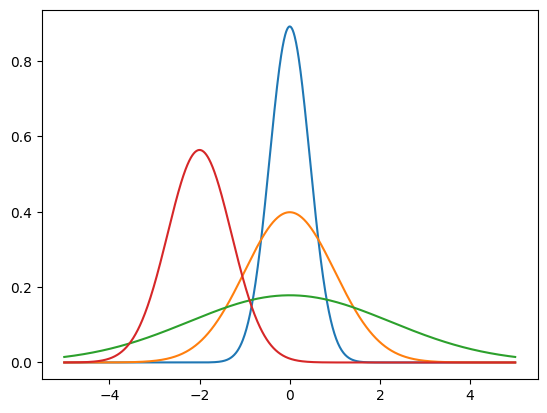

In [25]:
# blank plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#
x = np.linspace(-5.0,5.0,1001)

# plot values
ax.plot(x,normal_pdf(x,mu=-0.0,sigma=np.sqrt(0.2)))
ax.plot(x,normal_pdf(x,mu=-0.0,sigma=np.sqrt(1.0)))
ax.plot(x,normal_pdf(x,mu=-0.0,sigma=np.sqrt(5.0)))
ax.plot(x,normal_pdf(x,mu=-2.0,sigma=np.sqrt(0.5)))